# Color Identification in Images 


# Import libraries

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

# RGB2HEX is a function that will convert RGB to hex :

In [2]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

# get_image is the method that will help us get an image into Python in the RGB space :

In [3]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

# get_colors is the method that we can call to extract the top colors from the image and display them as a pie chart :

In [4]:
def get_colors(image,number_of_colors,show_chart):
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    counts = Counter(labels)
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)

    return rgb_colors

# Import and Visualise the image we are working on :

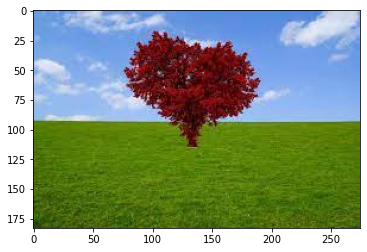

In [9]:
image = cv2.imread('C://Users//HP//Desktop//TSF GRIP//TASK1//images//img4.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

# Display its colors:

[array([90.82059776, 16.83524735, 19.50371761]),
 array([ 83.33059632, 120.24430658,  11.37622188]),
 array([167.58958944, 194.10315249, 235.84628543]),
 array([133.94805195,  99.4533859 , 106.30774583]),
 array([114.15379635, 158.63750452, 228.17019291])]

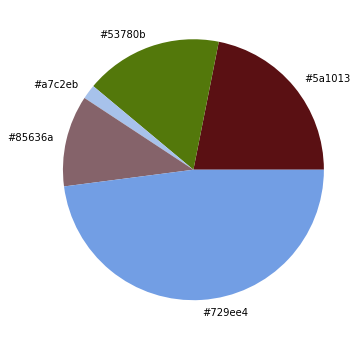

In [10]:
get_colors(image,5,True)